# Exploratory Data Analysis (EDA) on pokemon data set

Exploratory Data Analysis, or EDA, is an important step in any Data Analysis or Data Science project. EDA is the process of investigating the dataset to discover patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset. EDA involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better

We will start by importing the libraries we will require for performing EDA. These include NumPy, Pandas, Matplotlib, and Seaborn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('pokemon_data.csv')

In [3]:
df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


here it shows all the columns names contained in the dataset


In [4]:
df.columns


Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [5]:
df.head

<bound method NDFrame.head of        #                   Name   Type 1  Type 2  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison  45      49       49   
1      2                Ivysaur    Grass  Poison  60      62       63   
2      3               Venusaur    Grass  Poison  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison  80     100      123   
4      4             Charmander     Fire     NaN  39      52       43   
..   ...                    ...      ...     ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark  80     160       60   
799  721              Volcanion     Fire   Water  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0         65       65     45           

Perfect! The data looks just like we wanted it to. You can easily tell just by looking at the dataset that it contains data about different pokemons and their attack, defence, speed and generation. Let us start by looking at descriptive statistic parameters for the dataset. We will use describe() for this.

In [6]:
df.describe(include='all')

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800.000000,800,800,414,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800
unique,NaN,800,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Bulbasaur,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,1,112,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735
mean,362.813750,NaN,NaN,NaN,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,NaN
std,208.343798,NaN,NaN,NaN,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,NaN
min,1.000000,NaN,NaN,NaN,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,NaN
25%,184.750000,NaN,NaN,NaN,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,NaN
50%,364.500000,NaN,NaN,NaN,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,NaN
75%,539.250000,NaN,NaN,NaN,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,NaN


Missing value imputation
We will now check for missing values in our dataset. In case there are any missing entries, we will impute them with appropriate values (mode in case of categorical feature, and median or mean in case of numerical feature). We will use the isnull() function for this purpose.

This will tell us how many missing values we have in each column in our dataset. The output (Pandas Series) should look like this:

In [7]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Unfortunately for us here type 2 got null values. we will drop the column Type 2 so that it will not be a problem for our  analysis. 

In [8]:
del df['Type 2']

we will check if the column is deleted in dataframe by printing dataframe.

In [9]:
df

,#,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,80,160,60,170,130,80,6,True


We will now proceed to analyze this dataset, observe patterns, and identify outliers with the help of graphs and figures.

here we will check means of attack, defense and speed.

In [10]:
df.pivot_table(columns='Type 1', values='Attack', aggfunc=['mean', 'count'])

mean                                                       \
Type 1        Bug       Dark   Dragon   Electric      Fairy   Fighting   
Attack  70.971014  88.387097  112.125  69.090909  61.529412  96.777778   

                                               ... count                   \
Type 1       Fire Flying     Ghost      Grass  ... Ghost Grass Ground Ice   
Attack  84.769231  78.75  73.78125  73.214286  ...    32    70     32  24   

                                               
Type 1 Normal Poison Psychic Rock Steel Water  
Attack     98     28      57   44    27   112  

[1 rows x 36 columns]

In [11]:
df.pivot_table(columns='Type 1', values='Defense', aggfunc=['mean', 'count'])

mean                                                      \
Type 1         Bug       Dark  Dragon   Electric      Fairy   Fighting   
Defense  70.724638  70.225806  86.375  66.295455  65.705882  65.925926   

                                          ... count                          \
Type 1        Fire Flying    Ghost Grass  ... Ghost Grass Ground Ice Normal   
Defense  67.769231  66.25  81.1875  70.8  ...    32    70     32  24     98   

                                         
Type 1  Poison Psychic Rock Steel Water  
Defense     28      57   44    27   112  

[1 rows x 36 columns]

In [12]:
df.pivot_table(columns='Type 1', values='Speed', aggfunc=['mean', 'count'])

mean                                                     \
Type 1        Bug      Dark    Dragon Electric      Fairy   Fighting   
Speed   61.681159  76.16129  83.03125     84.5  48.588235  66.074074   

                                               ... count                   \
Type 1       Fire Flying     Ghost      Grass  ... Ghost Grass Ground Ice   
Speed   74.442308  102.5  64.34375  61.928571  ...    32    70     32  24   

                                               
Type 1 Normal Poison Psychic Rock Steel Water  
Speed      98     28      57   44    27   112  

[1 rows x 36 columns]

Now we will use pair plot function for better understanding the best set of features to explain a relationship between two variables or to form the most separated clusters.

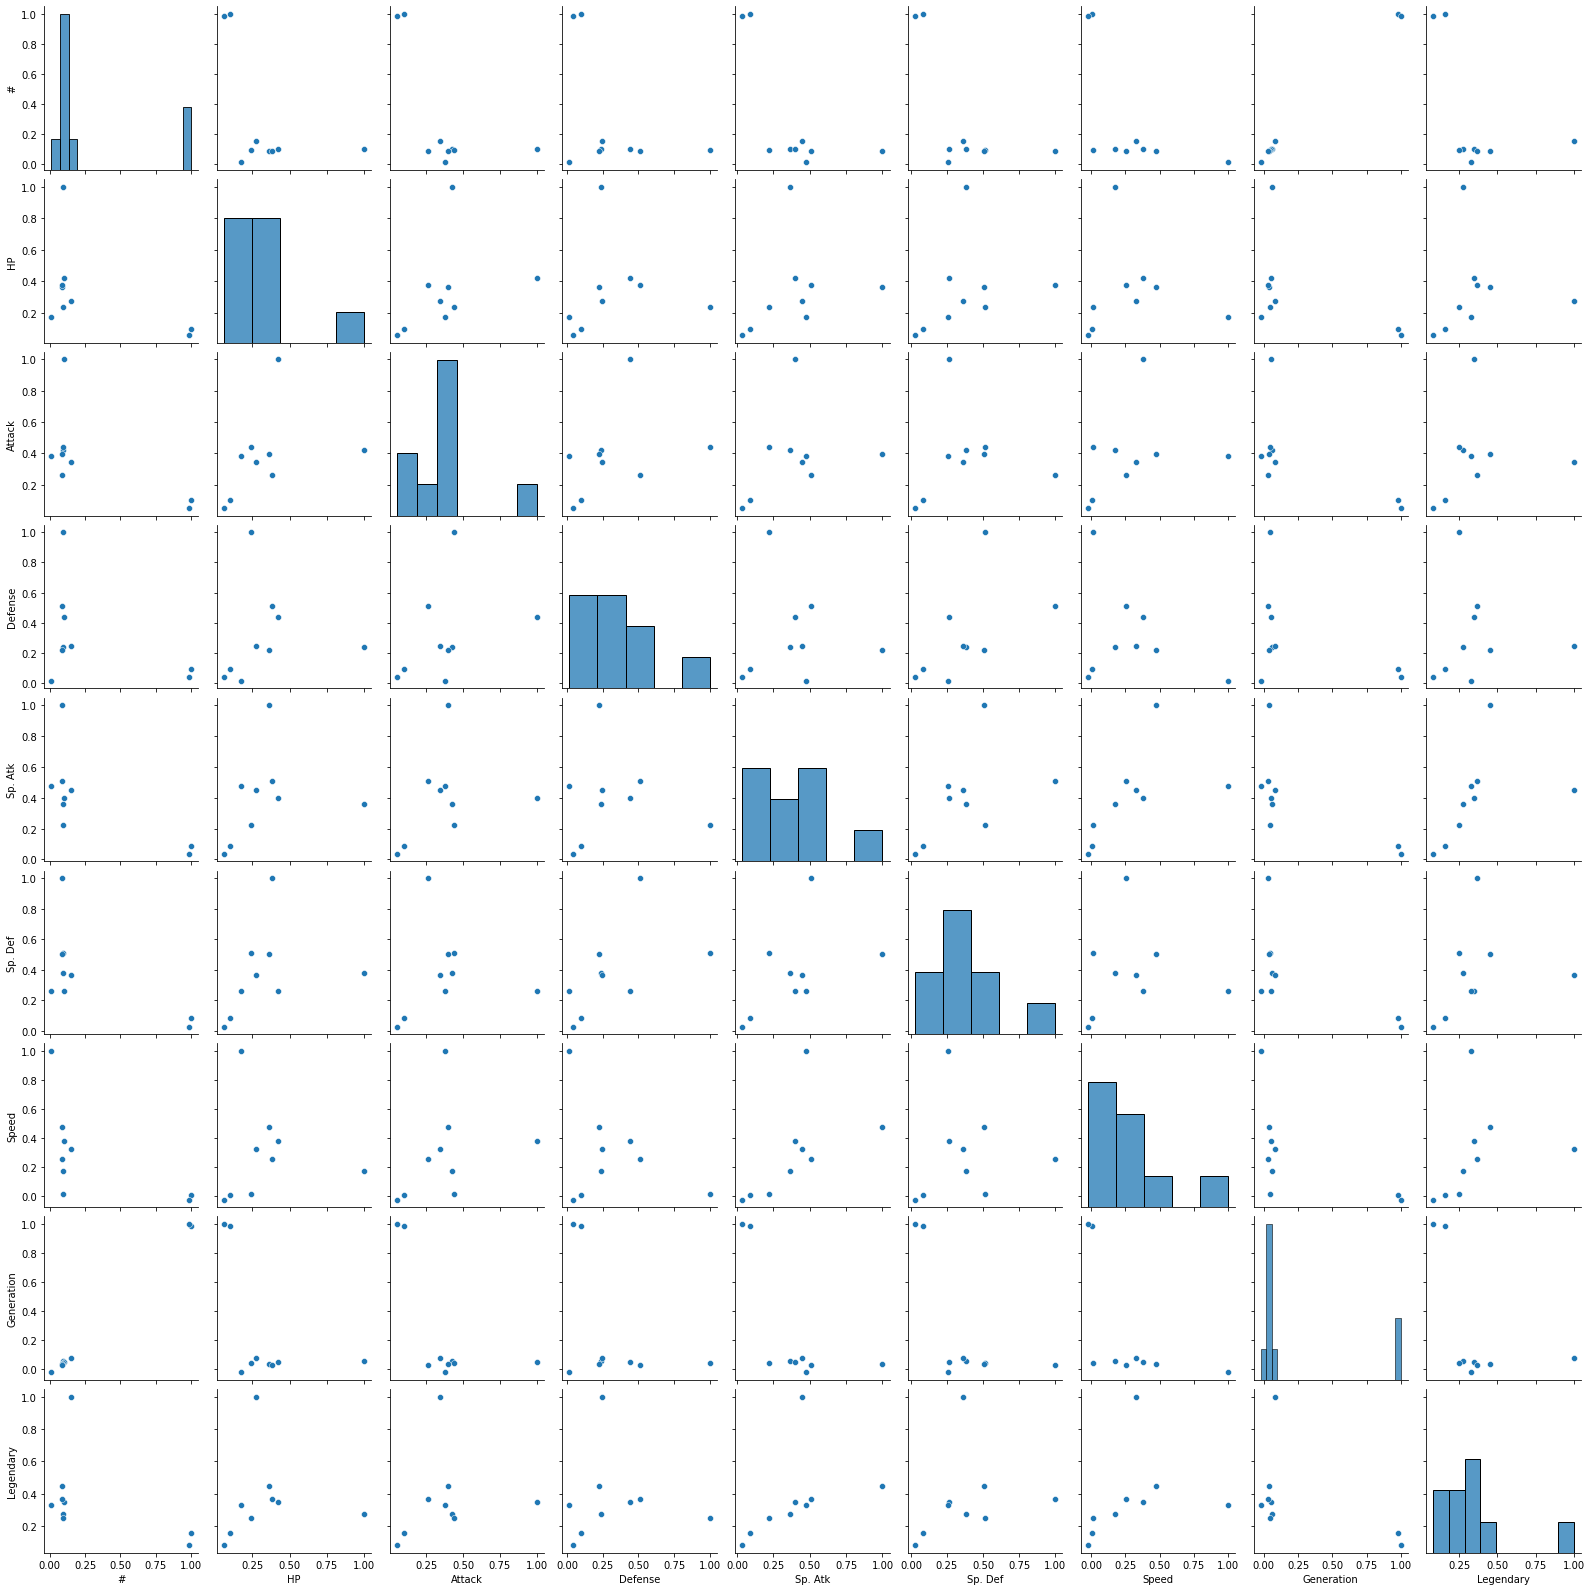

In [21]:
sns.pairplot(df.corr())

the pairplot visualizes the correlation table in a form and shows how strongly two variables are related, we'll use heatmap next to make it more visualizing.

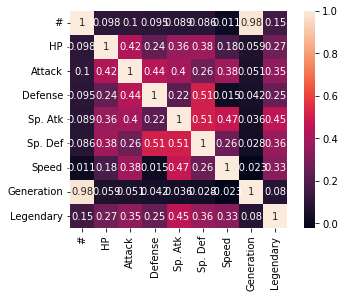

In [22]:
corr = df.corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

We will now make a distribution plot. A distribution plot tells us how the data is distributed. We will use the distplot function.

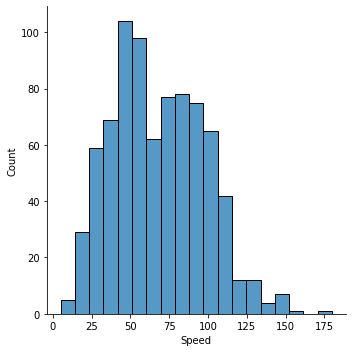

In [23]:
sns.displot(df['Speed'])

<AxesSubplot:xlabel='Attack', ylabel='Count'>

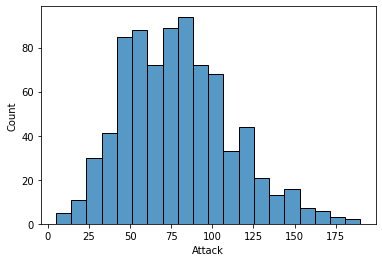

In [24]:
sns.histplot(df['Attack'])

We will now move on to Bivariate Analysis. We will look at a relational plot in Seaborn. It helps us to understand the relationship between 2 variables on different subsets of the dataset.

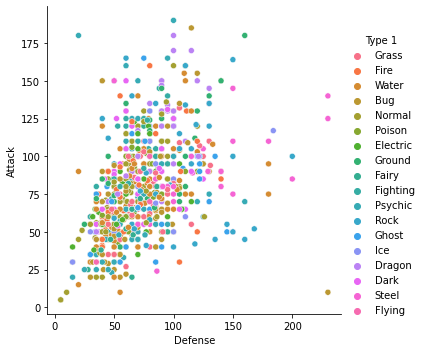

In [25]:
sns.relplot(x='Defense', y='Attack', hue='Type 1', data=df)

Boxplots are a measure of how well distributed the data in a data set is. It divides the data set into three quartiles. This graph represents the minimum, maximum, median, first quartile and third quartile in the data set. It is also useful in comparing the distribution of data across data sets by drawing boxplots for each of them.

<AxesSubplot:>

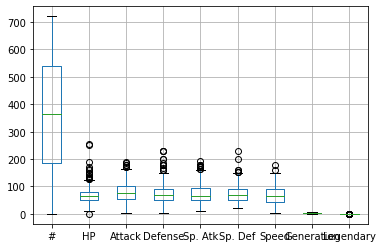

In [26]:
df.boxplot()

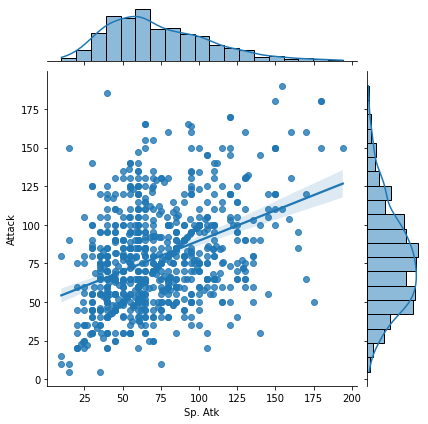

In [27]:
sns.jointplot(x="Sp. Atk", y="Attack", data=df, kind="reg")

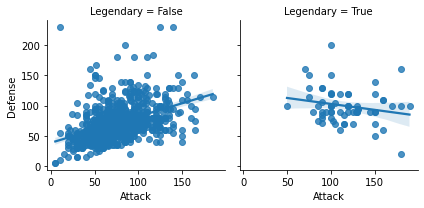

In [29]:
sns.lmplot(x="Attack", y="Defense", col="Legendary", data=df, col_wrap=2, height=3)

# DONE BY
20PA1A0533 Venu Dampanaboyina 
20PA1A0563 Lokesh Anji babu javvadi
20pa1a0506 Srinivas Raju alluri 